# Introducción

**PENDIENTE** 


Escribir un breve texto acerca de:
- Objetivo del desafío
- Plantear el problema que nos propusimos
- ¿Cuál es nuestra meta?
- ¿Cuales son los criterios de nuestro trabajo? (Herramientas que vamos a utilizar)
- ¿De qué se trata y de dónde obtuvimos nuestro dataset? 

# Lectura del dataset

In [1]:
#Importo bibliotecas

import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importo el dataset

data = pd.read_csv('../Data/Aprender2018-primaria-6.csv', sep=';')

C:\Users\alexc\anaconda3\envs\dhdsblend\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (113) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The reason you get this low_memory warning is because guessing dtypes for each column is very memory demanding. Pandas tries to determine what dtype to set by analyzing the data in each column. 

Fuente: https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options

In [3]:
# Corroboramos que se haya importado correctamente

data.head(5)

,ap1,ap2,ap3a,ap3b,ap3c,ap4,ap5a,ap5b,ap5c,ap5d,...,ponder,lpondera,ldesemp,lpuntaje,mpondera,mdesemp,mpuntaje,isocioa,isocioal,isocioam
0,4,2,1,1,1,10,2,2,1,2,...,"3,1642308","3,4787247",4,"624,30237","3,6379006",3,"497,9606",-1,-1,-1
1,2,1,1,1,1,4,1,1,-9,1,...,"3,1642308","3,4787247",3,"541,39209","3,6379006",3,"511,72632",1,1,1
2,2,1,1,1,1,6,1,1,-9,1,...,"3,1642308","3,4787247",3,"470,68723","3,6379006",3,"497,24191",2,2,2
3,5,2,1,1,1,6,1,1,2,1,...,"2,203661","2,208158",2,"434,76788","2,2108715",1,"364,33578",3,3,3
4,4,2,1,1,1,5,1,1,-9,1,...,"2,203661","2,208158",2,"418,23492","2,2108715",1,"366,13287",2,2,2


# Parseo (entender los datos)

**PENDIENTE**

Descripción de las columnas (variables) del df.
- Problema: son demasiadas columnas
- Solución 1: dejar un link directo al excel con el diccionario
- Solución 2: crear un diccionario para renombrar todas las columnas

In [4]:
# Breve resumen del df
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579510 entries, 0 to 579509
Columns: 124 entries, ap1 to isocioam
dtypes: int64(114), object(10)
memory usage: 548.2+ MB


In [106]:
# ¿Cuántas filas y columnas hay? ¿y datos?
print('Filas:', data.shape[0])
print('Columnas:', data.shape[1])
print('Datos:', data.size)

Filas: 579510
Columnas: 124
Datos: 71859240


In [6]:
# ¿Qué tipos de datos tiene?
data.dtypes.value_counts()

int64     114
object     10
dtype: int64

In [7]:
# ¿Cuáles son las columnas de tipo objeto?
data_object = data.dtypes == object
data.loc[:,data_object].sample(3)

,ICSE,ponder,lpondera,ldesemp,lpuntaje,mpondera,mdesemp,mpuntaje,isocioal,isocioam
318506,3,1,1,2,"417,6015","1,2810993",1,"368,65927",2,2
413356,1,"1,3084238","1,3110938",3,"493,35904","1,5002341",3,"476,11435",2,2
520769,3,"1,9160796","1,4902327",1,"368,87115","1,4805777",2,"461,48688",-1,-1


Luego de inspeccionar el diccionario de variables y los posibles valores para cada una de ellas, identificamos que el dataframe contiene en su totalidad **variables categóricas numéricas** (a pesar de haber algunas variables de tipo `object`)

### Análisis de valores vacíos, en blanco y multimarca

In [8]:
# ¿Hay valores nulos?
data.isnull().any(axis=1).sum()

0

El dataset no tiene valores nulos

**OPCIONAL** Hacer función para buscar valores vacíos, en blanco o multimarca

In [58]:
# Analisis de las variables con valores vacíos (espacios en blanco)

data_empty_mask = data == ' '
print('Cantidad de respuestas con valores vacíos: ',data_empty_mask.sum().sum())

data_empty = data_empty_mask.sum() != 0
print('\nDistribuidas en', data_empty.value_counts().iloc[0], 'columnas\n')

print('Columnas con mayor cantidad (en porcentaje):')
columns_most_empty = data_empty_mask.sum().sort_values(ascending=False).head(10)
print(columns_most_empty/len(data))

Cantidad de respuestas con valores vacíos:  190000

Distribuidas en 115 columnas

Columnas con mayor cantidad (en porcentaje):
mpuntaje    0.047418
mdesemp     0.047418
mpondera    0.047418
ldesemp     0.039164
lpondera    0.039164
lpuntaje    0.039164
isocioam    0.036065
isocioal    0.029756
ICSE        0.002297
ap16        0.000000
dtype: float64


No hay variables que muestren una cantidad significativa de valores vacíos

In [53]:
# Analisis de las variables con valores "en blanco"(-9)

data_white_mask = data == -9
print('Cantidad de respuestas con valor "en blanco": ',data_white_mask.sum().sum())

data_white = data_white_mask.sum() != 0
print('\nDistribuidas en', data_white.value_counts().iloc[0], 'columnas\n')

print('Columnas con mayor cantidad (en porcentaje):')
columns_most_white = data_white_mask.sum().sort_values(ascending=False).head(10) 
print(columns_most_white/len(data))

Cantidad de respuestas con valor "en blanco":  6413110

Distribuidas en 110 columnas

Columnas con mayor cantidad (en porcentaje):
ap5h     0.989103
ap5g     0.493964
ap5c     0.439047
ap5e     0.422707
ap5f     0.402055
ap26d    0.211244
ap26e    0.201948
ap26b    0.183030
ap13c    0.177885
ap5d     0.175959
dtype: float64


La variable "¿Con quién vivís? No sé" tiene casi todos los valores (98%) en blanco, por lo cual resulta irrelevante.

In [54]:
# Analisis de las variables con valores "multimarca"(-6)

data_multiple_mask = data == -6
print('Cantidad de respuestas con valor "multimarca": ',data_multiple_mask.sum().sum())

data_multiple = data_multiple_mask.sum() != 0
print('\nDistribuidas en', data_multiple.value_counts().iloc[0], 'columnas\n')

print('Columnas con mayor cantidad (en porcentaje):')
columns_most_multiple = data_multiple_mask.sum().sort_values(ascending=False).head(10) 
print(columns_most_multiple/len(data))

Cantidad de respuestas con valor "multimarca":  82298

Distribuidas en 83 columnas

Columnas con mayor cantidad (en porcentaje):
ap16     0.032995
ap41a    0.007546
ap13a    0.005948
ap13b    0.004695
ap25a    0.004631
ap5d     0.004390
ap41b    0.003101
ap25d    0.002932
ap25b    0.002568
ap25f    0.002328
dtype: float64


No hay variables que muestren una cantidad significativa de valores "multimarca"

In [60]:
# Análisis de observaciones duplicados

data.duplicated().sum()

106

**DEBATIR**

Hay 106 valores que se reconocen como duplicados. Ahora bien, ¿estamos seguros de que son duplicados? Ninguna de las variables refiere a un valor único e irrepetible para cada alumno que participó de la prueba (ej: DNI o código de alumno)

### Analizamos la variable target 

In [15]:
# ¿Qué valores toma "Desempeño en matemática"?
data.mdesemp.value_counts()

3    211584
2    124422
4    113519
1    102506
      27479
Name: mdesemp, dtype: int64

3    0.37
2    0.21
4    0.20
1    0.18
     0.05
Name: mdesemp, dtype: float64


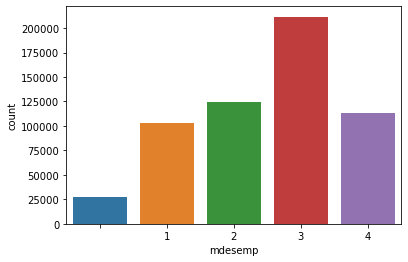

In [16]:
# ¿Están las clases balanceadas?
print(data.mdesemp.value_counts(normalize=True, ascending=False).round(2))

sns.countplot(data.mdesemp.sort_values(), label="Count")
plt.show()

**OPCIONAL** Podemos mejorar el gráfico (agregar labels con los porcentajes a cada barra)

**DEBATE** ¿Están balanceadas las clases? Agregar texto explicando por qué sí o por que nó

**pendiente** ESTADÍSTICA DESCRIPTIVA

# MINAR (preparar, estructurar y limpiar los datos)

Objetivos:
- Eliminar variables innecesarias
- Realizar una muestra aleatoria para agilizar el trabajo computacional
- Decidir como tratar los valores atípicos
- Crear nuevas variables derivadas de los datos: recodificaciones, info nueva, etc

### Variable dependiente/target

**PENDIENTE** Explicar por qué vamos a eliminar las filas con campos vacíos

In [96]:
# Eliminamos los campos de la variable target vacíos
rows_mdesemp_to_drop = data.loc[data_empty_mask.mdesemp,:].index
# rows_mdesemp_to_drop.index
data1 = data.drop(rows_mdesemp_to_drop, axis=0)
data1.shape

(552031, 124)

In [100]:
print('Cantidad de filas eliminadas:', data.shape[0]-data1.shape[0])

Cantidad de filas eliminadas: 27479


3    0.38
2    0.23
4    0.21
1    0.19
Name: mdesemp, dtype: float64


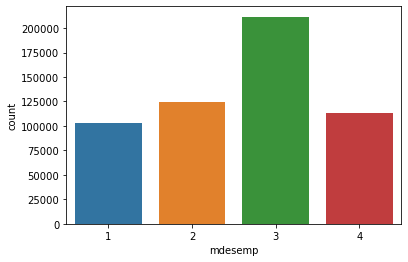

In [101]:
# ¿Están las clases balanceadas?
print(data1.mdesemp.value_counts(normalize=True, ascending=False).round(2))

sns.countplot(data1.mdesemp.sort_values(), label="Count")
plt.show()

**PENDIENTE** Otra vez, ¿están balanceadas las clases?

### Variables independientes

Variables explicativas que no utilizaremos:
- ICSE
- ponder
- pondera
- lpuntaje
- mpondera
- mpuntaje
- isocioa
- isocioal
- isocioam
- ap5h **RENOMBRAR**
- ldesemp

In [117]:
# Generamos un nuevo dataframe sin las columnas innecesarias
columns_to_drop = ['ICSE','ponder','lpondera','lpuntaje','mpondera','mpuntaje',
                   'isocioa','isocioal','isocioam','ap5h','ldesemp']
data2 = data1.drop(columns_to_drop, axis=1)
data2.shape

(552031, 113)

### Tipos de datos

In [118]:
print(data2.dtypes.value_counts(),'\n')

data2_object_mask = data2.dtypes == object
print(data2.loc[:,data2_object_mask].columns)

int64     112
object      1
dtype: int64 

Index(['mdesemp'], dtype='object')


La variable target es la única con tipo de datos `object`. Como solo tiene valores numéricos (1, 2, 3 y 4) la transformamos a `int64` y pasamos a trabajar con un dataset uniforme

In [129]:
data3 = data2
data3['mdesemp'] = data2.mdesemp.astype('int64')
data3.dtypes.value_counts()

int64    113
dtype: int64

In [170]:
# ¿Sigue habiendo valores con espacios en blanco?

data3_empty_mask = data3 == ' '
data3_empty_mask.sum().sum()

0

### Tamaño de la muestra

In [131]:
print('Tamaño del dataset transformado:', data3.size)

Tamaño del dataset transformado: 62379503


In [163]:
# Generamos un nuevo df a partir de una muestra aleatoria
data4 = data3.sample(frac=0.001, random_state=123)
print('Tamaño de la muestra:', data4.size)

Tamaño de la muestra: 62376


3    0.40
2    0.22
1    0.19
4    0.19
Name: mdesemp, dtype: float64


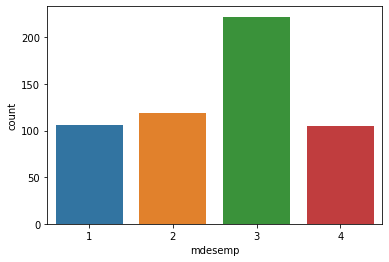

In [161]:
# Corroboramos que las categorías de la variable target sigan balanceadas
print(data4.mdesemp.value_counts(normalize=True, ascending=False).round(2))

sns.countplot(data4.mdesemp.sort_values(), label="Count")
plt.show()